In [39]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from PIL import Image
from IPython.display import Image, display

In [40]:
modelname = '/workspaces/icecream-streamlit-combo/modelz/icecream'
#model.save(modelname,save_format='h5')

trained_model = keras.models.load_model(modelname)
#img_to_predict = // input image img_test[test_img_index]

#flatten_image = img_to_predict.reshape(-1, IMG_HEIGHT*IMG_WIDTH*3)

#pred_dist = mtrained_modelodel.predict(flatten_image)
print('done')


done


In [41]:
IMG_SIZE = 32
LABELS = ['bj','breyers','hd','talenti']
IMG_HEIGHT = IMG_SIZE
IMG_WIDTH  = IMG_SIZE

imgx = '/workspaces/icecream-streamlit-combo/projdata/testss/breyers/10_breyers.png'

img_arr = cv2.imread(imgx)[...,::-1] #convert BGR to RGB format
resized_arr = cv2.resize(img_arr, (IMG_HEIGHT, IMG_WIDTH)) # Reshaping images to preferred size
                


In [42]:
resized_arr.shape

(32, 32, 3)

In [43]:

img_to_predict = resized_arr

flatten_image = img_to_predict.reshape(-1, IMG_HEIGHT*IMG_WIDTH*3)

res = batch_input_shape=(-1, 32, 32, 3)

flatten_image = flatten_image.reshape(res)

In [44]:
flatten_image.shape

(1, 32, 32, 3)

In [45]:
pred_dist = trained_model.predict(flatten_image)

pred_index = np.argmax(pred_dist[0])
pred_label = LABELS[pred_index]


1/1 [==============================] - 0s 40ms/step


(400, 400, 3)


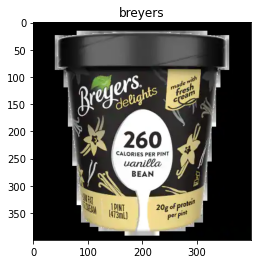

In [46]:
#data = np.asarray(img_test[test_img_index])
data = np.asarray(img_arr)
print(data.shape)
imgplot = plt.imshow(data)
plt.title(pred_label)
plt.show()